# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

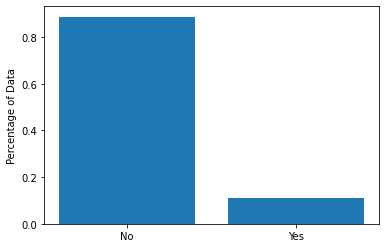

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
###############
###TRANSFORM###
###############

X_scaled_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_scaled, y_train)

sorted(Counter(y_train_SMOTE["yes"]).items())

[(0, 25580), (1, 25580)]

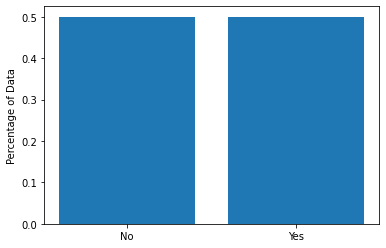

In [23]:
obs = len(y_train_SMOTE)
plt.bar(["No","Yes"],[len(y_train_SMOTE[y_train_SMOTE.yes==0])/obs,len(y_train_SMOTE[y_train_SMOTE.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [31]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.192\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.518\ngini = 0.283\nsamples = 19198\nvalue = [15925, 3273]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.096\nsamples = 9741\nvalue = [9249, 492]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.079\nsamples = 9554\nvalue = [9163, 391]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 187\nvalue = [86, 101]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.415\nsamples = 9457\nvalue = [6676, 2781]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.478\nsamples = 6820\nvalue = [4123, 2697]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.062\nsamples = 2637\nvalue = [2553, 84]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.422\nsamples = 31962\nvalue = [9655, 22307]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.696\ngini = 0.343\nsamples = 26178\nvalue = [5749, 20429]\nclass = 

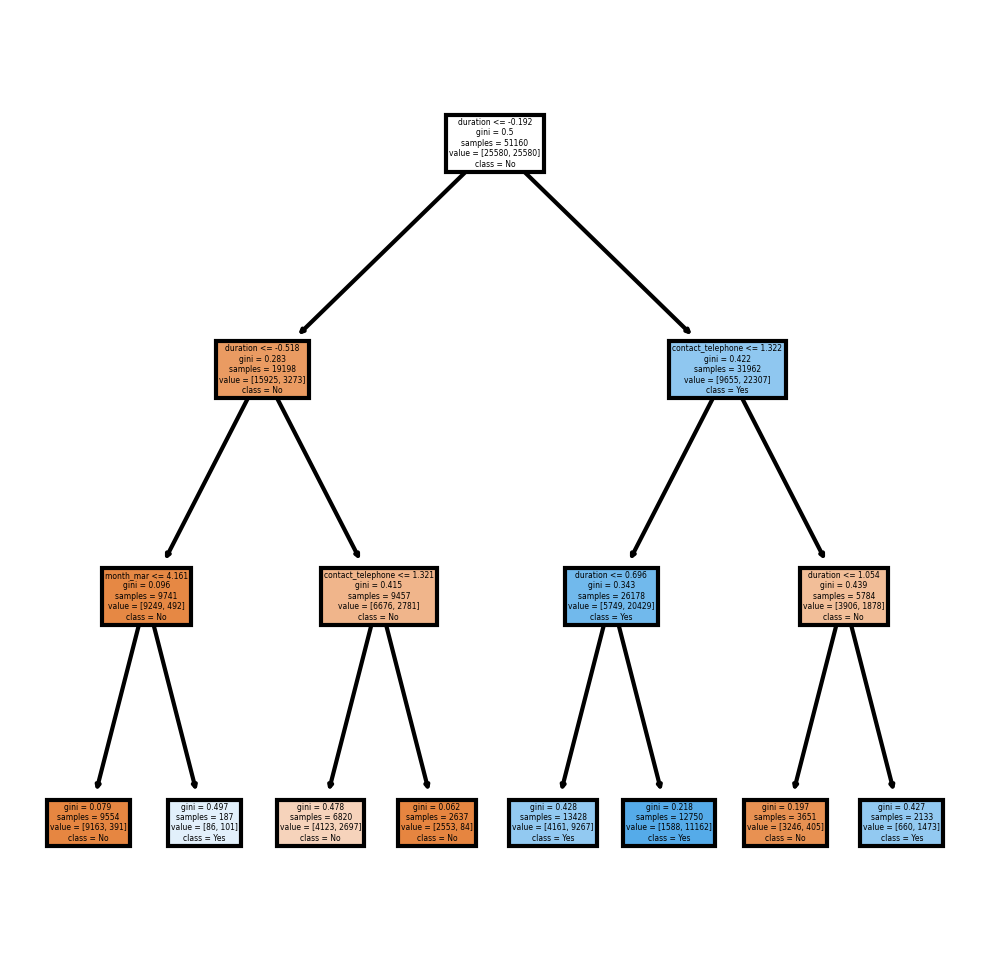

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [33]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

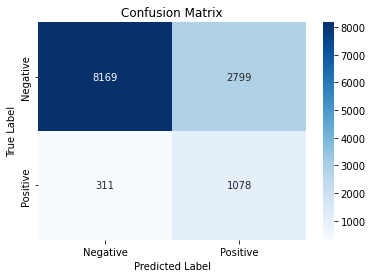

In [34]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [38]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled_SMOTE, y_train_SMOTE)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7505867119851096


In [39]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

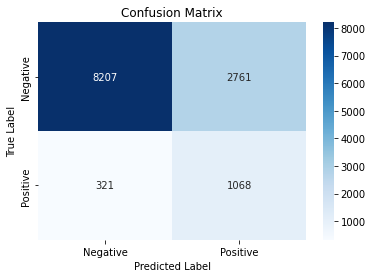

In [40]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled_SMOTE, y_train_SMOTE)

y_pred = adaboost.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [44]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

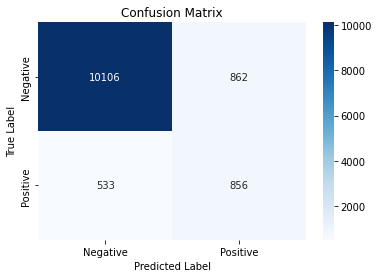

In [45]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [46]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 8.0 MB/s eta 0:00:00


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from mlens.ensemble import SuperLearner

In [53]:
### SET YOUR BASE LEARNERS

base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    MLPClassifier()
]

super_learner = SuperLearner()
super_learner.add(base_estimators)


### FIT TO TRAINING DATA
super_learner.fit(X_scaled_SMOTE, y_train_SMOTE)



### GET base_predictions
base_predictions = super_learner.predict(X_scaled_SMOTE)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [54]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train_SMOTE)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[ 6.97504813, -7.62226094, -0.4991586 ,  2.47192263,  6.97504813]])

The first and last coefficients (6.97504813) indicate that the first and last base models (LogisticRegression and MLPClassifier) have a positive impact on the prediction of the target variable.
The second coefficient (-7.62226094) indicates that the second base model (RandomForestClassifier) has a negative impact on the prediction of the target variable.
The third coefficient (-0.4991586) indicates that the third base model (GaussianNB) has a small negative impact on the prediction of the target variable.
The fourth coefficient (2.47192263) indicates that the fourth base model (DecisionTreeClassifier) has a positive impact on the prediction of the target variable.

In [56]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_pred = log_reg.predict(super_learner.predict(X_test))
y_true = y_test
cm_super = confusion_matrix(y_true, y_pred)
print('Confusion matrix:', cm_super)

Confusion matrix: [[10328   640]
 [  754   635]]


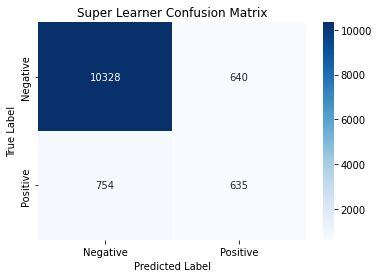

In [57]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Super Learner Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show() 

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [60]:
# Sensitivity for Decision Tree model
sensitivity_dt = cm_raw[1,1]/(cm_raw[1,0]+cm_raw[1,1])

# Sensitivity for Bagged model
sensitivity_bag = cm_bag[1,1]/(cm_bag[1,0]+cm_bag[1,1])

# Sensitivity for Boosted model
sensitivity_boost = cm_boost[1,1]/(cm_boost[1,0]+cm_boost[1,1])

# Sensitivity for Super Learner model
sensitivity_super = cm_super[1,1] / (cm_super[1,0] + cm_super[1,1])

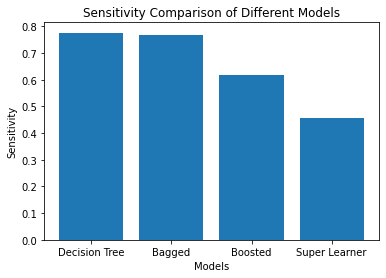

In [61]:
# Set the data for the bar chart
sensitivities = [sensitivity_dt, sensitivity_bag, sensitivity_boost, sensitivity_super]
models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']

# Create a bar chart
plt.bar(models, sensitivities)

plt.xlabel('Models')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Comparison of Different Models')

plt.show()